# 1 - Perkenalan

Nama : Wardatul Fadhilah

Batch : 014

Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Objective : Dilakukan permodelan untuk prediksi  telco customer churn.


# 2 - Import Libraries

In [1]:
!pip install feature-engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, concatenate, Dropout
from tensorflow import keras

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 - Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset

df = pd.read_csv('/content/drive/My Drive/Hacktiv8/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data = df.copy()

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 4 - Exploratory Data Analysis (EDA)

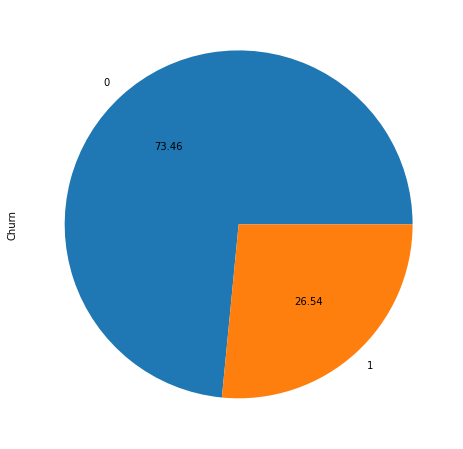

In [10]:
data['Churn'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Berdasarkan visualisasi data, 0 (No) lebih dominan sebesar 73.46% yang artinya pelanggan yang membatalkan cukup banyak. 1 (Yes) sebanyak 26.54% yang berarti pelanggan yang suka dengan layanan yang diberikan.

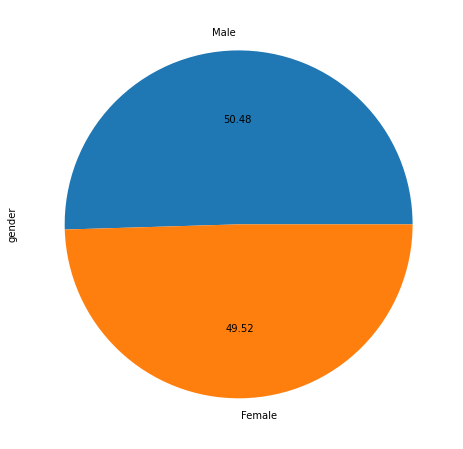

In [11]:
data['gender'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Berdasarkan visualisasi data, pelanggan female dan male jumlahnya tidak jaug berbeda.

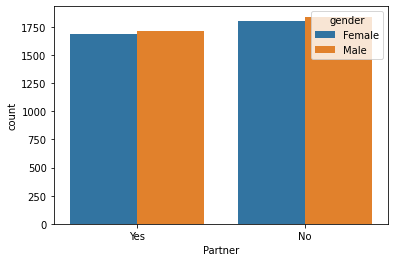

In [12]:
sns.countplot(x='Partner', hue='gender', data=data)

Dari visualisasi data terrlihat bahwa gender yang menjadi parner maupun tidak jumlahnya tidak berbeda signifikan.

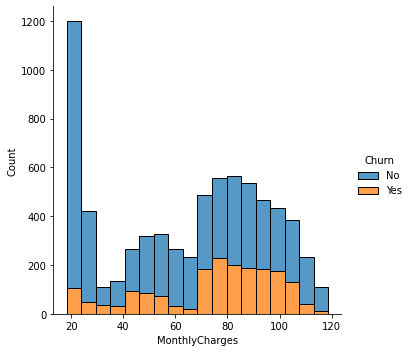

In [13]:
sns.displot(df, x="MonthlyCharges", hue="Churn", multiple="stack")

Berdasarkan visualisasi data, terlihat bahwa tagihan bulanan tidak berpengaruh terhadap pelanggan tetap.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


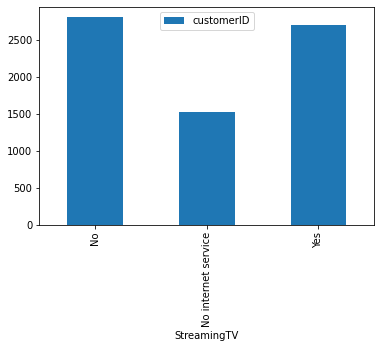

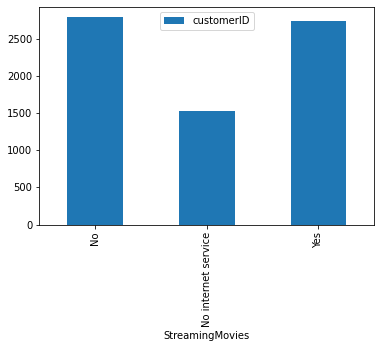

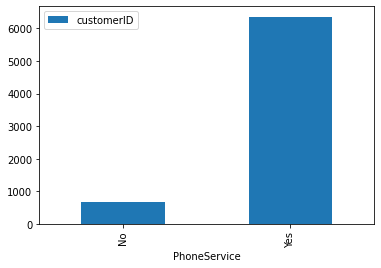

In [70]:
print(df.groupby('StreamingTV').count()[['customerID']].plot(kind= 'bar'))
print(df.groupby('StreamingMovies').count()[['customerID']].plot(kind= 'bar'))
print(df.groupby('PhoneService').count()[['customerID']].plot(kind= 'bar'))

Terlihat masih ada pelanggan yang jarang menggunakan layanan yang telah ada. Banyak yang hanya menggunakan telpon saja.

In [15]:
data.drop(['customerID', 'gender'], axis=1, inplace=True)

Drop customerid dan gender karena berisi nilai unique yang tidak baik untuk permodelan.

# 5 - Data Processing

In [16]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state=26)
data_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
633,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0
3137,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0
930,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0
1008,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1
5153,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0
399,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.10,0
5286,0,Yes,No,8,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,609.90,1
3231,0,No,No,15,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85,0
6395,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,1
4727,0,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,0


In [17]:
data_inf.shape

(20, 19)

In [18]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [19]:
# Reset Index (meminimalisir error)

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0
1,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0
2,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0
3,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1
4,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0
5,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.10,0
6,0,Yes,No,8,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,609.90,1
7,0,No,No,15,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85,0
8,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,1
9,0,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,0


Reset index untuk mengurutkan indexnya agar tidak terjadi error.

## Feature Selection

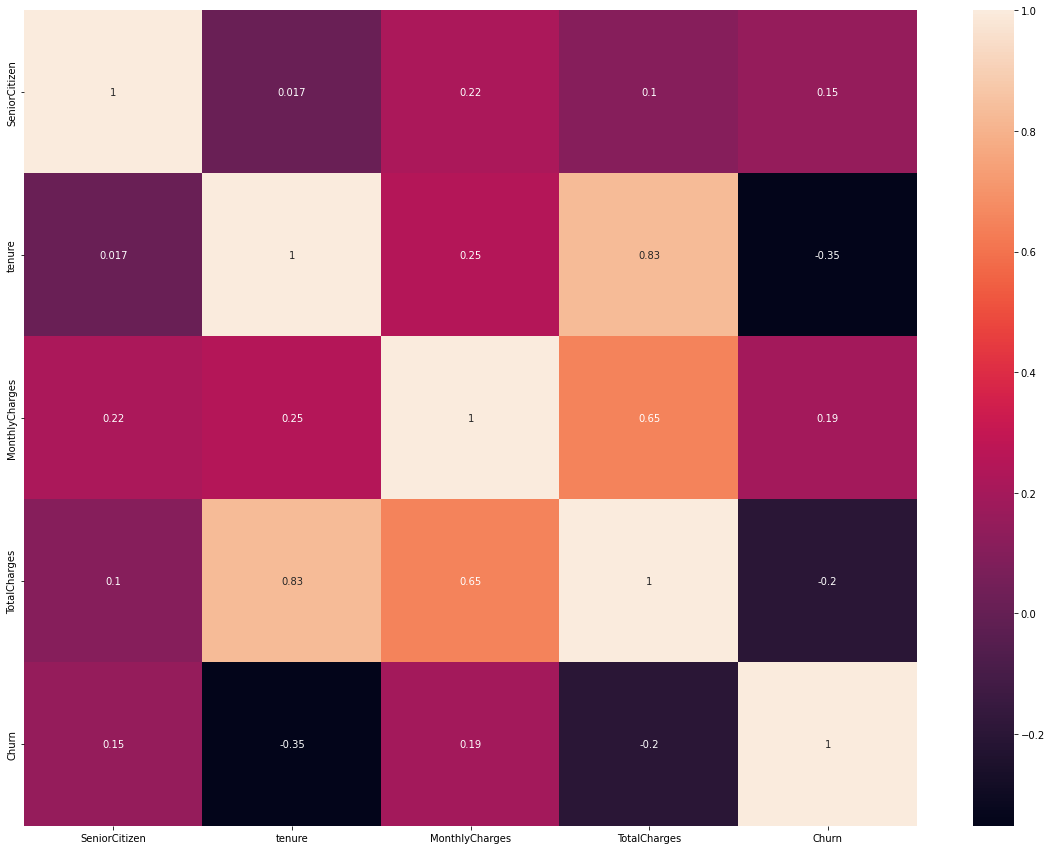

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

senior citizen dan monhtly charges yang paling berkolerasi.

## Splitting Dataset

In [21]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [22]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Val Size  : ', X_val.shape)

Train Size :  (5056, 18)
Test Size  :  (703, 18)
Val Size  :  (1264, 18)


In [23]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

## Handling Missing Value

In [24]:
# Check Missing Values in X_train

X_train.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [25]:
# Check Missing Values in X_test

X_test.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [26]:
# Check Missing Values in X_val

X_val.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [27]:
# Check Missing Values in y_train

y_train.isnull().sum()

0

In [28]:
# Check Missing Values in y_test

y_test.isnull().sum()

0

In [29]:
# Check Missing Values in y_val

y_val.isnull().sum()

0

In [30]:
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)
X_val['TotalCharges'].fillna(X_val['TotalCharges'].median(), inplace=True)

Handling missing value dengan median.

## Handling Outlier

In [31]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

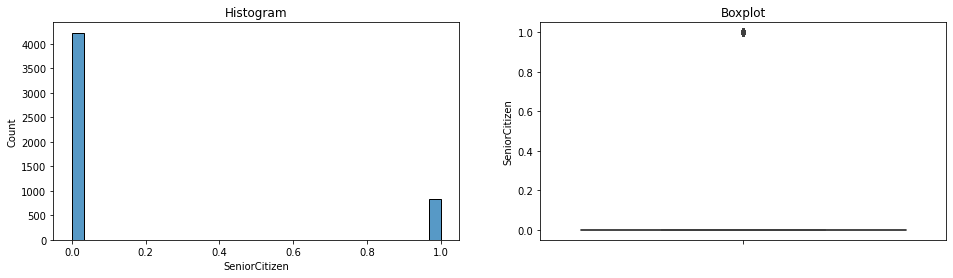


Skewness Value SeniorCitizen :  1.8196656081099176


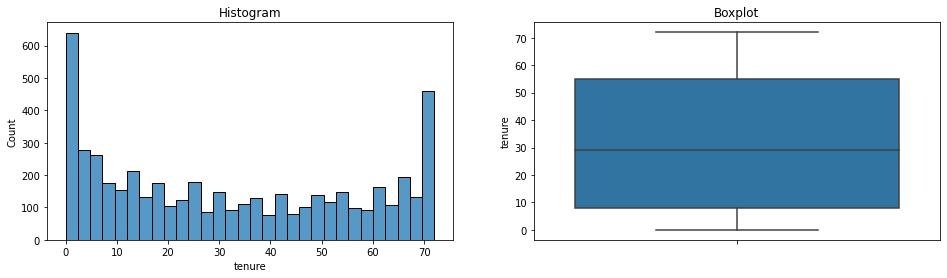


Skewness Value Tenure :  0.24251429612814757


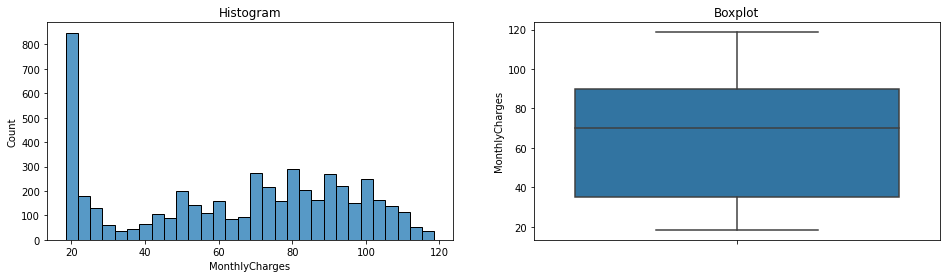


Skewness Value MonthlyCharges :  -0.21961622130843086


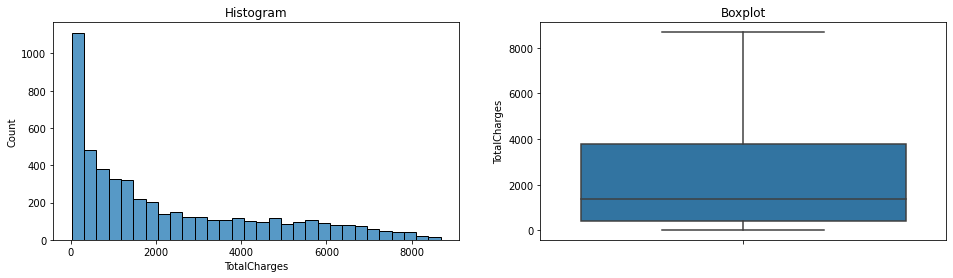


Skewness Value TotalCharges :  0.9567739623463334


In [32]:
diagnostic_plots(X_train, 'SeniorCitizen')
print('\nSkewness Value SeniorCitizen : ', X_train['SeniorCitizen'].skew())

diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value Tenure : ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value MonthlyCharges : ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value TotalCharges : ', X_train['TotalCharges'].skew())

In [33]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])
windsoriser.fit(X_train)

X_train_cleaned = windsoriser.transform(X_train)

In [34]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'SeniorCitizen': 0.0, 'tenure': -62.5, 'MonthlyCharges': -46.600000000000016, 'TotalCharges': -4689.9875}
Right Tail Caps :  {'SeniorCitizen': 0.0, 'tenure': 125.5, 'MonthlyCharges': 171.90000000000003, 'TotalCharges': 8862.2125}


In [35]:
X_train_cleaned

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3193,0.0,Yes,No,72.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),88.05,6520.80
3799,0.0,Yes,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55
3424,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),71.30,157.75
3112,0.0,No,No,16.0,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,59.40,1023.90
3096,0.0,No,No,26.0,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),49.15,1237.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0,Yes,No,64.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,No,Bank transfer (automatic),97.00,6430.90
3077,0.0,No,No,17.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.65,1640.00
1040,0.0,No,No,52.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Credit card (automatic),74.00,3877.65
4061,0.0,Yes,Yes,14.0,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,65.45,937.60


## Split between Numerical Columns and Categorical Columns

In [36]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_cleaned.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [37]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train_cleaned[num_columns]
X_train_cat = X_train_cleaned[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

## Feature Scaling

In [38]:
# Feature Scaling using MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_val_scaled = scaler.transform(X_val_num)

## Feature Encoding

In [39]:
# Feature Encoding using OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(X_train_cat)

X_train_encoded = encoder.transform(X_train_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()
X_val_encoded = encoder.transform(X_val_cat).toarray()

In [40]:
X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis =1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis =1)
X_val_final = np.concatenate([X_val_scaled, X_val_encoded], axis =1)

## Pipeline

In [41]:
num_pipe = Pipeline(steps=[('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown = 'ignore'))])

Pembuatan pipeline encoding dan scaling

In [42]:
num_features = num_columns
cat_features = cat_columns

In [43]:
preprocessor = ColumnTransformer(transformers=[('numeric', num_pipe, num_features),
                                               ('categorical', cat_pipe, cat_features)
                                               ])

Melakukan column transformer setelah scaling dan encoding.

In [44]:
preprocessor.fit(X_train_cleaned)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Partner', 'Dependents', 'PhoneService',
                                  'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

Preprocessor untuk X train.

In [45]:
X_train_prep = preprocessor.transform(X_train_cleaned)
X_val_prep   = preprocessor.transform(X_val)
X_test_prep  = preprocessor.transform(X_test)

Transform untuk X_train, X_val, X_test.

In [46]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_prep, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_prep, y_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_prep, y_val))
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(64)

Membuat tensorflow pipeline.

# 6 - Model Definition

## Sequential API Method

In [47]:
model_seq = Sequential()
model_seq.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape=(X_train_final.shape[1], )))
model_seq.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_seq.add(Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_seq.add(Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

## Functional API Method

In [48]:
data_in = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())(data_in)
hidden_2 = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())(hidden_1)
hidden_3 = Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())(hidden_2)
concat = concatenate([data_in, hidden_3])
out = Dense(1, activation='sigmoid')(concat)

model_fun = Model(inputs=data_in,
              outputs=out)

model_fun.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

## Sequential API Method Improvement

In [49]:
model_seq2 = Sequential()

model_seq2.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape=(X_train_final.shape[1], )))
model_seq2.add(Dropout(rate=0.1))

model_seq2.add(Dense(8,activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_seq2.add(Dropout(rate=0.1))

model_seq2.add(Dense(4,activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_seq2.add(Dropout(rate=0.1))

model_seq2.add(Dense(2,activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_seq2.add(Dropout(rate=0.1))

model_seq2.add(Dense(1, activation='sigmoid'))

model_seq2.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

## Functional API Method Improvement

In [50]:
data_in2 = Input(shape=(X_train_final.shape[1],))

hidden_1_imp = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())(data_in2)
hidden_1_imp = Dropout(rate=0.1)(data_in2)

hidden_2_imp = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())(hidden_1_imp)
hidden_2_imp = Dropout(rate=0.1)(hidden_1_imp)

hidden_3_imp = Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal())(hidden_2_imp)
hidden_3_imp = Dropout(rate=0.1)(hidden_2_imp)

concat2 = concatenate([data_in2, hidden_3_imp])
out2 = Dense(1, activation='sigmoid')(concat2)

model_fun2 = Model(inputs=data_in2, outputs=out2)

model_fun2.compile(loss='binary_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

# 7 - Model Training

## Sequential API Method

In [ ]:
history_seq = model_seq.fit(train_dataset, epochs=100, batch_size=64, validation_data=(val_dataset),verbose=1)

## Functional API Method

In [ ]:
history_fun = model_fun.fit(train_dataset, epochs=100, batch_size=64, validation_data=(val_dataset),verbose=1)

## Sequential API Method Improvement

In [ ]:
history_seq2 = model_seq2.fit(train_dataset, epochs=100, batch_size=64, validation_data=(val_dataset),verbose=1)

## Functional API Method Improvement

In [ ]:
history_fun2 = model_fun2.fit(train_dataset, epochs=100, batch_size=64, validation_data=(val_dataset),verbose=1)

# 8 - Model Evaluation

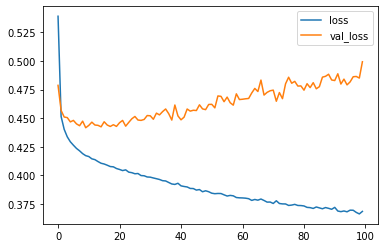

In [55]:
metrics_seq = pd.DataFrame(history_seq.history)
metrics_seq[['loss', 'val_loss']].plot()

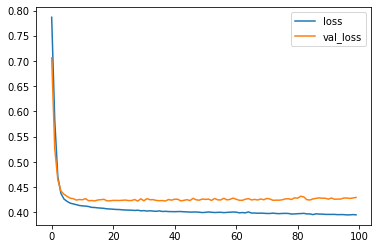

In [56]:
metrics_fun = pd.DataFrame(history_fun.history)
metrics_fun[['loss', 'val_loss']].plot()

In [57]:
y_train_pred_seq = model_seq.predict(X_train_prep)
y_train_pred_seq = np.where(y_train_pred_seq > 0.5, 1, 0)

y_test_pred_seq = model_seq.predict(X_test_prep)
y_test_pred_seq = np.where(y_test_pred_seq > 0.5, 1, 0)

print('Classification Report (Data Train)')
print('---------------------------------------------\n')
print(classification_report(y_train, y_train_pred_seq))
print('Classification Report (Data Test)')
print('---------------------------------------------\n')
print(classification_report(y_test, y_test_pred_seq))

Classification Report (Data Train)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3723
           1       0.73      0.58      0.65      1333

    accuracy                           0.83      5056
   macro avg       0.80      0.75      0.77      5056
weighted avg       0.83      0.83      0.83      5056

Classification Report (Data Test)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       517
           1       0.62      0.44      0.51       186

    accuracy                           0.78       703
   macro avg       0.72      0.67      0.69       703
weighted avg       0.77      0.78      0.77       703



Dari classification report, diketahui bahwa accuracy dari permodel ini 78%. Untuk precision dari model untuk 0 adalah 82% dan untuk 1 adalah 62%.

In [61]:
y_train_pred_fun = model_fun.predict(X_train_prep)
y_train_pred_fun = np.where(y_train_pred_fun > 0.5, 1, 0)

y_test_pred_fun = model_fun.predict(X_test_prep)
y_test_pred_fun = np.where(y_test_pred_fun > 0.5, 1, 0)

print('Classification Report (Data Train)')
print('---------------------------------------------\n')
print(classification_report(y_train, y_train_pred_fun))
print('Classification Report (Data Test)')
print('---------------------------------------------\n')
print(classification_report(y_test, y_test_pred_fun))

Classification Report (Data Train)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3723
           1       0.73      0.49      0.58      1333

    accuracy                           0.82      5056
   macro avg       0.78      0.71      0.73      5056
weighted avg       0.81      0.82      0.80      5056

Classification Report (Data Test)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       517
           1       0.70      0.47      0.57       186

    accuracy                           0.81       703
   macro avg       0.77      0.70      0.72       703
weighted avg       0.80      0.81      0.79       703



Dari classification report, diketahui bahwa accuracy dari permodel ini 81%. Untuk precision dari model untuk 0 adalah 83% dan untuk 1 adalah 70%.

Dari kedua model Functional API score lebih baik.

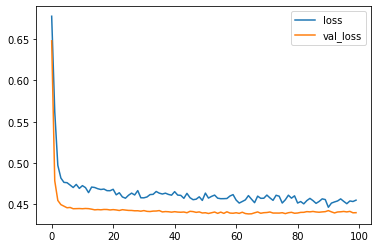

In [59]:
metrics_seq2 = pd.DataFrame(history_seq2.history)
metrics_seq2[['loss', 'val_loss']].plot()

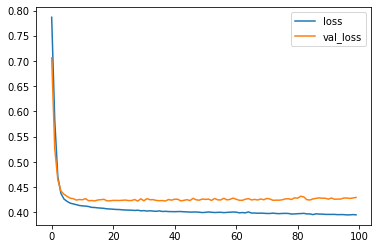

In [60]:
metrics_fun2 = pd.DataFrame(history_fun.history)
metrics_fun2[['loss', 'val_loss']].plot()

In [58]:
y_train_pred_seq2 = model_seq2.predict(X_train_prep)
y_train_pred_seq2 = np.where(y_train_pred_seq2 > 0.5, 1, 0)

y_test_pred_seq2 = model_seq2.predict(X_test_prep)
y_test_pred_seq2 = np.where(y_test_pred_seq2 > 0.5, 1, 0)

print('Classification Report (Data Train)')
print('---------------------------------------------\n')
print(classification_report(y_train, y_train_pred_seq2))
print('Classification Report (Data Test)')
print('---------------------------------------------\n')
print(classification_report(y_test, y_test_pred_seq2))

Classification Report (Data Train)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3723
           1       0.70      0.53      0.61      1333

    accuracy                           0.82      5056
   macro avg       0.77      0.73      0.74      5056
weighted avg       0.81      0.82      0.81      5056

Classification Report (Data Test)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       517
           1       0.67      0.52      0.58       186

    accuracy                           0.81       703
   macro avg       0.76      0.71      0.73       703
weighted avg       0.79      0.81      0.80       703



Dari classification report, diketahui bahwa accuracy dari permodel ini 81%. Untuk precision dari model untuk 0 adalah 84% dan untuk 1 adalah 67%.

In [62]:
y_train_pred_fun2 = model_fun2.predict(X_train_prep)
y_train_pred_fun2 = np.where(y_train_pred_fun2 > 0.5, 1, 0)

y_test_pred_fun2 = model_fun2.predict(X_test_prep)
y_test_pred_fun2 = np.where(y_test_pred_fun2 > 0.5, 1, 0)

print('Classification Report (Data Train)')
print('---------------------------------------------\n')
print(classification_report(y_train, y_train_pred_fun2))
print('Classification Report (Data Test)')
print('---------------------------------------------\n')
print(classification_report(y_test, y_test_pred_fun2))

Classification Report (Data Train)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3723
           1       0.67      0.54      0.60      1333

    accuracy                           0.81      5056
   macro avg       0.76      0.72      0.73      5056
weighted avg       0.80      0.81      0.80      5056

Classification Report (Data Test)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       517
           1       0.68      0.49      0.57       186

    accuracy                           0.81       703
   macro avg       0.76      0.70      0.72       703
weighted avg       0.79      0.81      0.79       703



Dari classification report, diketahui bahwa accuracy dari permodel ini 81%. Untuk precision dari model untuk 0 adalah 83% dan untuk 1 adalah 68%.

Dari kedua model Functional API Improvement score lebih baik.

# 9 - Model Saving

In [71]:
model_fun2.save('model')

Saving model yang dipilih.

# 10 - Model Inference

In [63]:
# Display Inference-Set

data_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0
1,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0
2,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0
3,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1
4,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0
5,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.10,0
6,0,Yes,No,8,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,609.90,1
7,0,No,No,15,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85,0
8,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,1
9,0,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,0


In [64]:
# Split between Numerical Columns and Categorical Columns 

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [65]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat).toarray()

In [66]:
# Concate Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.        , -0.90274442, -1.4723814 , -0.92746142,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.35671358,  1.47517972,  0.96918705,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
   

In [67]:
y_pred_inf_seq = model_seq2.predict(data_inf_final)
y_pred_inf_seq = np.where (y_pred_inf_seq > 0.5, 1,0)
y_pred_inf_seq = pd.DataFrame(y_pred_inf_seq, columns=['Prediction'])
y_pred_inf_seq

,Prediction
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,0


In [68]:
y_pred_inf_fun = model_fun2.predict(data_inf_final)
y_pred_inf_fun = np.where (y_pred_inf_fun > 0.5, 1,0)
y_pred_inf_fun = pd.DataFrame(y_pred_inf_fun, columns=['Prediction'])
y_pred_inf_fun

,Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [69]:
pd.concat([data_inf, y_pred_inf_seq, y_pred_inf_fun], axis=1)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction,Prediction
0,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0,0,0
1,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0,0,0
2,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,...,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0,0,0
3,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1,1,0
4,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0,0,0
5,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.05,415.10,0,0,0
6,0,Yes,No,8,Yes,No,Fiber optic,Yes,No,No,...,No,No,Month-to-month,Yes,Electronic check,74.50,609.90,1,1,1
7,0,No,No,15,Yes,No,DSL,Yes,Yes,Yes,...,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85,0,0,0
8,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,1,0,0
9,0,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,0,0,0


# 11 - Kesimpulan

## EDA
* Berdasarkan visualisasi data, 0 (No) lebih dominan sebesar 73.46% yang artinya pelanggan yang membatalkan cukup banyak. 1 (Yes) sebanyak 26.54% yang berarti pelanggan yang suka dengan layanan yang diberikan.
* Berdasarkan visualisasi data, pelanggan female dan male jumlahnya tidak jaug berbeda.
* Dari visualisasi data terrlihat bahwa gender yang menjadi parner maupun tidak jumlahnya tidak berbeda signifikan.
* Berdasarkan visualisasi data, terlihat bahwa tagihan bulanan tidak berpengaruh terhadap pelanggan tetap.
Terlihat masih ada pelanggan yang jarang menggunakan layanan yang telah ada. Banyak yang hanya menggunakan telpon saja.

---

Precision score pada pembuatan model menjadi perhatian karena false positif merugikan karna bisa saja ketika pelanggan terdeteksi Churn 0 (No) atau tidak menggunakan lagi tapi sebenarnya masih menggunakan. Dari ke 4 model yang digunakan, model Functional API dengan Improvement menjadi model terbaik dengan precision score 81%, masih dikatakan belum baik karena masih salah prediksi 19%.